<a href="https://colab.research.google.com/github/maxriosg/TelecomX_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd

In [51]:
df = pd.read_csv("datos_tratados.csv")

In [52]:
df.head()

customerID  Evasion TipoContrato  FacturacionElectronica        MetodoPago  \
0  0002-orfbo      0.0        anual                       1      mailed check   
1  0003-mknfe      0.0      mensual                       0      mailed check   
2  0004-tlhlj      1.0      mensual                       1  electronic check   
3  0011-igkff      0.0      mensual                       1  electronic check   
4  0013-exchz      1.0      mensual                       1      mailed check   

   PagoMensual  PagoTotal customer_gender  customer_seniorcitizen  \
0         65.6     593.30          female                       0   
1         59.9     542.40            male                       0   
2         73.9     280.85            male                       0   
3         98.0    1237.85            male                       1   
4         83.9     267.40          female                       1   

   customer_partner  ...  phone_phoneservice  phone_multiplelines  \
0               NaN  ...                 yes                   no   
1               0.0  ...                 yes                  yes   
2               0.0  ...                 yes                   no   
3               NaN  ...                 yes                   no   
4               NaN  ...                 yes                   no   

  internet_internetservice internet_onlinesecurity internet_onlinebackup  \
0                      dsl                      no                   yes   
1                      dsl                      no                    no   
2              fiber optic                      no                    no   
3              fiber optic                      no                   yes   
4              fiber optic                      no                    no   

  internet_deviceprotection internet_techsupport internet_streamingtv  \
0                        no                  yes                  yes   
1                        no                   no                   no   
2                       yes                   no                   no   
3                       yes                   no                  yes   
4                        no                  yes                  yes   

  internet_streamingmovies Cuentas_Diarias  
0                       no        2.186667  
1                      yes        1.996667  
2                       no        2.463333  
3                      yes        3.266667  
4                       no        2.796667  

[5 rows x 22 columns]

In [53]:
df.columns

Index(['customerID', 'Evasion', 'TipoContrato', 'FacturacionElectronica',
       'MetodoPago', 'PagoMensual', 'PagoTotal', 'customer_gender',
       'customer_seniorcitizen', 'customer_partner', 'customer_dependents',
       'customer_tenure', 'phone_phoneservice', 'phone_multiplelines',
       'internet_internetservice', 'internet_onlinesecurity',
       'internet_onlinebackup', 'internet_deviceprotection',
       'internet_techsupport', 'internet_streamingtv',
       'internet_streamingmovies', 'Cuentas_Diarias'],
      dtype='object')

In [54]:
columna_a_eliminar = 'customerID'
df.drop(columns=[columna_a_eliminar], inplace=True)

In [55]:
print(df.columns)

Index(['Evasion', 'TipoContrato', 'FacturacionElectronica', 'MetodoPago',
       'PagoMensual', 'PagoTotal', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'Cuentas_Diarias'],
      dtype='object')


In [56]:
categorical_cols = df.select_dtypes(include='object').columns

In [57]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [58]:
print("Tipos de datos despu√©s de la codificaci√≥n:")
print(df_encoded.info())

Tipos de datos despu√©s de la codificaci√≥n:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Evasion                                        7267 non-null   float64
 1   FacturacionElectronica                         7267 non-null   int64  
 2   PagoMensual                                    7267 non-null   float64
 3   PagoTotal                                      7267 non-null   float64
 4   customer_seniorcitizen                         7267 non-null   int64  
 5   customer_partner                               3749 non-null   float64
 6   customer_dependents                            5086 non-null   float64
 7   customer_tenure                                7267 non-null   int64  
 8   Cuentas_Diarias                                7267 non-null   float64
 9   TipoCon

In [59]:
# 1. Calcular el conteo de cada clase en la columna 'Evasion'
churn_counts = df_encoded['Evasion'].value_counts()
print("Conteo de clientes por clase de 'Evasion':")
print(churn_counts)

Conteo de clientes por clase de 'Evasion':
Evasion
0.0    4723
1.0    2544
Name: count, dtype: int64


In [60]:
# 2. Calcular la proporci√≥n (porcentaje) de cada clase
total_clients = churn_counts.sum()
churn_proportions = churn_counts / total_clients * 100

print("\nProporci√≥n de clientes por clase de 'Evasion':")
print(churn_proportions)


Proporci√≥n de clientes por clase de 'Evasion':
Evasion
0.0    64.992432
1.0    35.007568
Name: count, dtype: float64


In [61]:
# 3. Identificar si existe un desbalance (opcional, pero √∫til para la interpretaci√≥n)
# Asumiendo que 1.0 es 'Evasion' (churn) y 0.0 es 'No Evasion' (no churn)
churn_percentage = 0.0  # Initialize to 0.0
no_churn_percentage = 0.0 # Initialize to 0.0

if 1.0 in churn_proportions.index:
    churn_percentage = churn_proportions[1.0]

if 0.0 in churn_proportions.index:
    no_churn_percentage = churn_proportions[0.0]

print(f"\nPorcentaje de clientes que CANCELARON (Evasion = 1): {churn_percentage:.2f}%")
print(f"Porcentaje de clientes que NO CANCELARON (Evasion = 0): {no_churn_percentage:.2f}%")


Porcentaje de clientes que CANCELARON (Evasion = 1): 35.01%
Porcentaje de clientes que NO CANCELARON (Evasion = 0): 64.99%


In [62]:
!pip install imbalanced-learn

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Recuperar X y y (preferiblemente los conjuntos balanceados con SMOTE)
# Si no aplicaste SMOTE, usa X y y originales (df_encoded.drop('Evasion', axis=1) y df_encoded['Evasion'])
# Aqu√≠ asumo que quieres trabajar con los datos balanceados si usaste SMOTE.
# Since SMOTE failed due to only one class in 'Evasion', we will use the original dataframes X and y.
X = df_encoded.drop('Evasion', axis=1) # Todas las columnas excepto 'Evasion'
y = df_encoded['Evasion']             # La columna 'Evasion'


# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Es crucial hacer esto ANTES de escalar para evitar data leakage
# Removed stratify=y because y has only one class, which causes an error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 'stratify=y' asegura que la proporci√≥n de clases en y se mantenga en los conjuntos de train y test.

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


# 3. Identificar las columnas num√©ricas que necesitan ser escaladas
# Las columnas One-Hot Encoding (0/1) no necesitan ser escaladas.
# Identificaremos las columnas que NO son binarias (es decir, no fueron creadas por get_dummies y no son 0/1)
# Ojo: esto es una heur√≠stica. Es mejor conocer tus datos.
# Las columnas originales num√©ricas eran: 'PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias'
# De las columnas actuales en X_train, debemos excluir las que ya son binarias (0 o 1)
numerical_cols_to_scale = []
for col in X_train.columns:
    # Una forma de identificar columnas no binarias es ver si tienen m√°s de 2 valores √∫nicos
    # y no fueron creadas por one-hot encoding (que t√≠picamente son int)
    # o si son nuestras columnas num√©ricas originales.
    if X_train[col].nunique() > 2 and X_train[col].dtype != 'object':
        numerical_cols_to_scale.append(col)

print(f"\nColumnas num√©ricas a escalar: {numerical_cols_to_scale}")


# 4. Crear una instancia del StandardScaler
scaler = StandardScaler()

# 5. Ajustar el scaler SOLO en los datos de entrenamiento y luego transformar
# Fit (aprender los par√°metros de media y desviaci√≥n est√°ndar) solo de X_train
X_train_scaled = scaler.fit_transform(X_train[numerical_cols_to_scale])

# Transformar X_train y X_test usando el scaler ajustado
X_test_scaled = scaler.transform(X_test[numerical_cols_to_scale])

# Re-convertir a DataFrame para mantener los nombres de las columnas y facilitar el manejo
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols_to_scale, index=X_test.index)

# Concatenar las columnas escaladas con las columnas categ√≥ricas (que no se escalan)
# Primero, identifica las columnas que NO se escalaron
cols_not_scaled = [col for col in X_train.columns if col not in numerical_cols_to_scale]

# Unir las columnas escaladas y no escaladas
X_train_final = pd.concat([X_train_scaled_df, X_train[cols_not_scaled]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[cols_not_scaled]], axis=1)


# 6. Verificar los resultados
print("\nPrimeras 5 filas de X_train_final (despu√©s de estandarizar):")
print(X_train_final.head())

print("\nMedia y desviaci√≥n est√°ndar de las columnas escaladas en X_train_final:")
print(X_train_final[numerical_cols_to_scale].describe().loc[['mean', 'std']])

# Asegurar de que las medias sean cercanas a 0 y las desviaciones est√°ndar cercanas a 1
# para las columnas escaladas.

Dimensiones de X_train: (5813, 31)
Dimensiones de X_test: (1454, 31)
Dimensiones de y_train: (5813,)
Dimensiones de y_test: (1454,)

Columnas num√©ricas a escalar: ['PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias']

Primeras 5 filas de X_train_final (despu√©s de estandarizar):
      PagoMensual  PagoTotal  customer_tenure  Cuentas_Diarias  \
4292     0.986761   0.308875        -0.054918         0.986761   
4794     1.009994   0.885539         0.514928         1.009994   
3172    -0.926644  -0.958010        -1.194608        -0.926644   
6358    -0.714228  -0.909329        -1.113202        -0.714228   
1956     0.440785  -0.971537        -1.276015         0.440785   

      FacturacionElectronica  customer_seniorcitizen  customer_partner  \
4292                       1                       0               0.0   
4794                       1                       0               NaN   
3172                       1                       0               0.0   
6358         

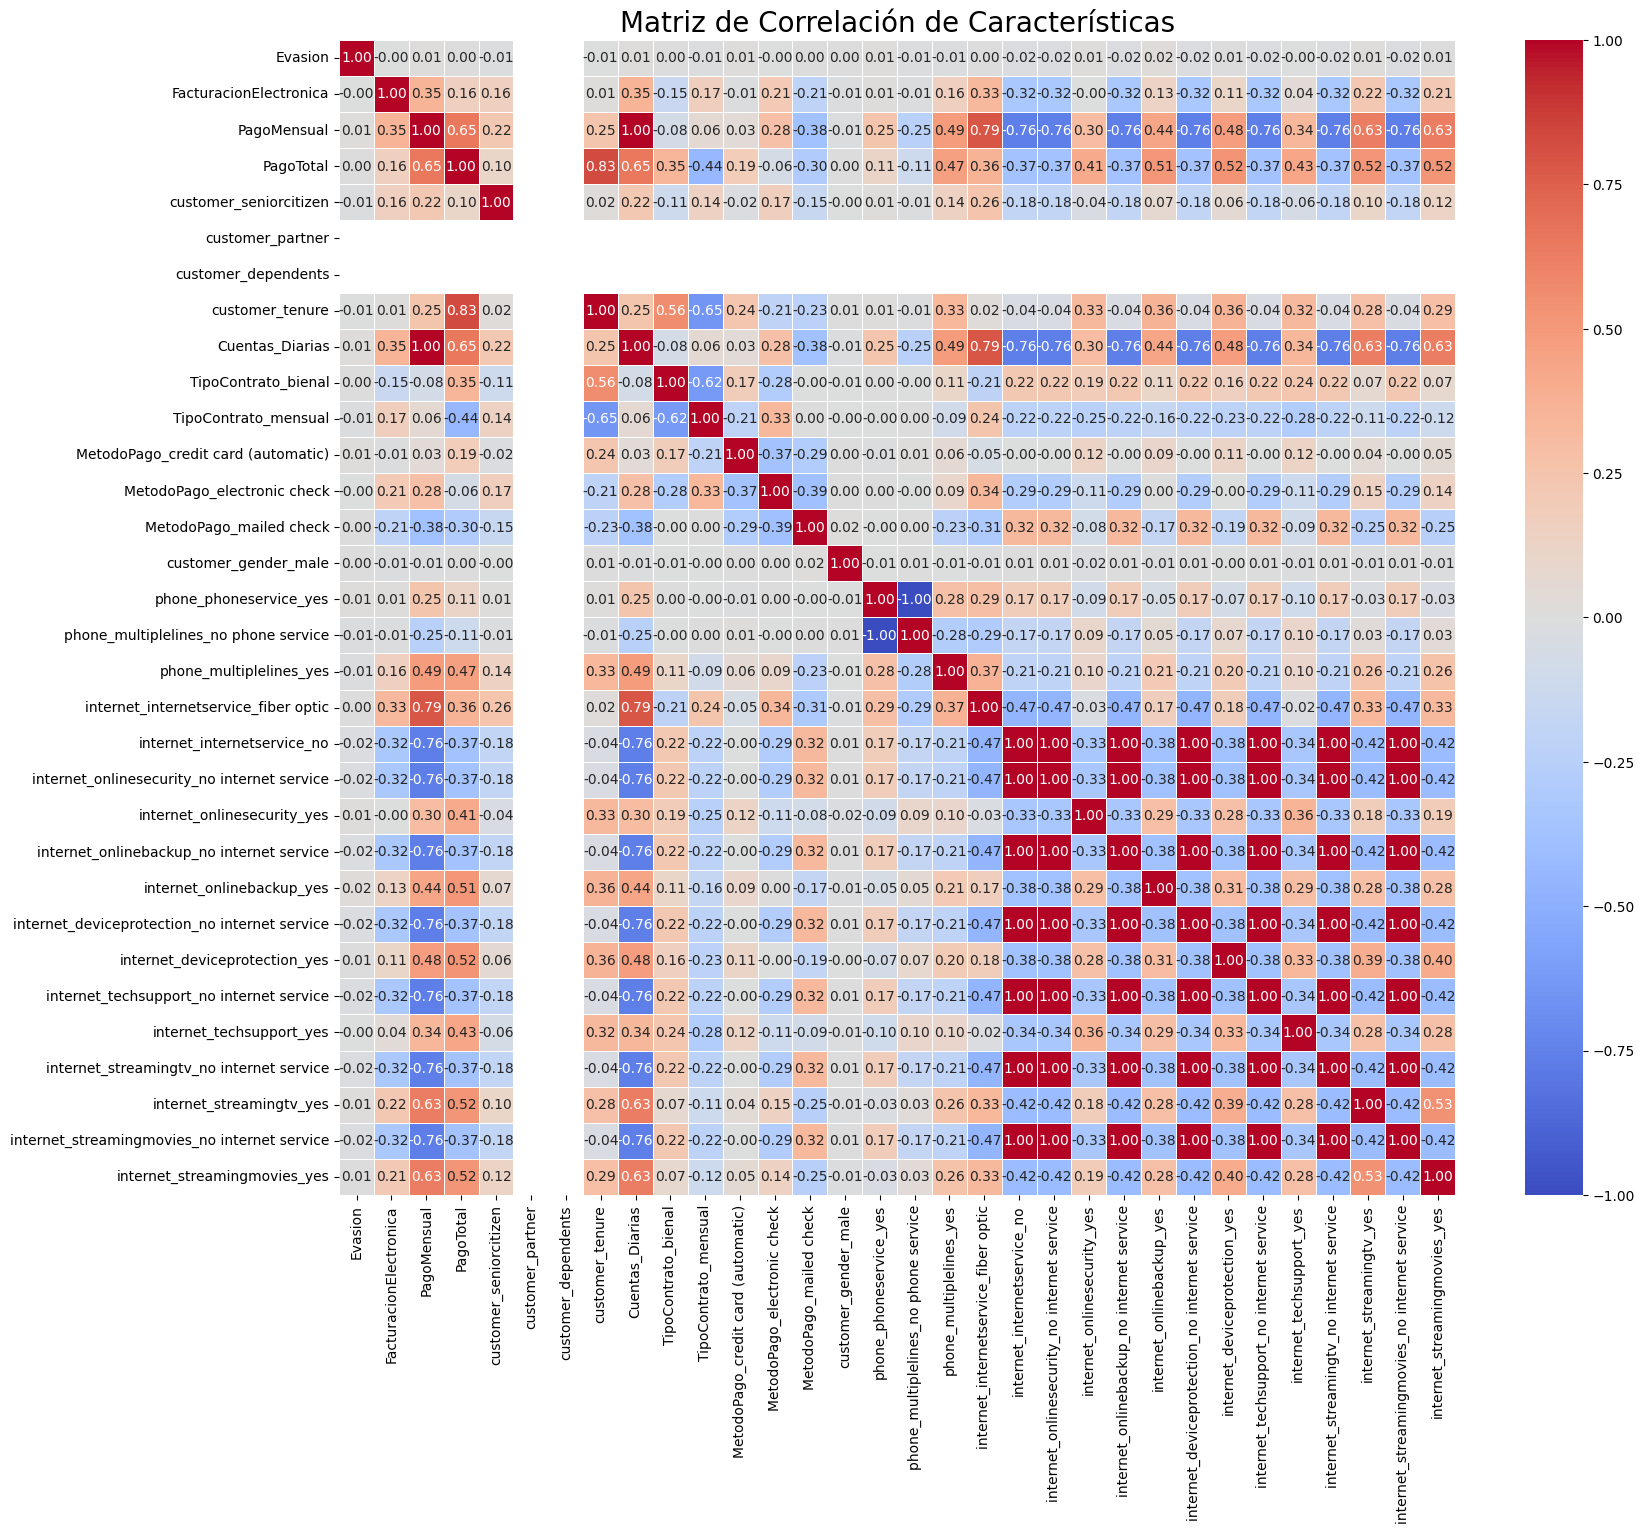


Correlaci√≥n de todas las variables con 'Evasion':
Evasion                                          1.000000
internet_onlinebackup_yes                        0.020889
internet_onlinesecurity_yes                      0.013754
Cuentas_Diarias                                  0.012800
PagoMensual                                      0.012800
MetodoPago_credit card (automatic)               0.011979
internet_streamingtv_yes                         0.011442
phone_phoneservice_yes                           0.009251
internet_deviceprotection_yes                    0.005447
internet_streamingmovies_yes                     0.005440
customer_gender_male                             0.004311
internet_internetservice_fiber optic             0.001428
PagoTotal                                        0.000973
MetodoPago_mailed check                          0.000772
TipoContrato_bienal                              0.000553
FacturacionElectronica                          -0.000691
internet_techsupport

/tmp/ipython-input-64-3818848509.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, palette='viridis')


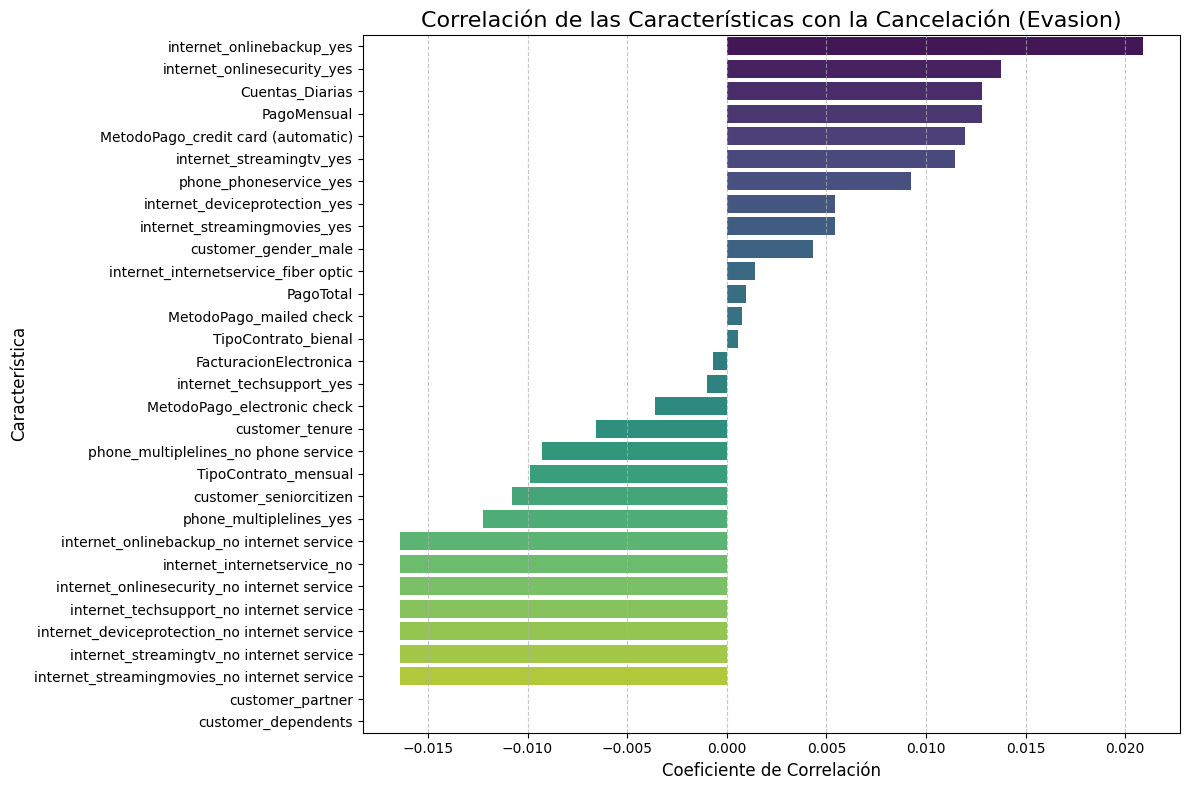

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular la matriz de correlaci√≥n
correlation_matrix = df_encoded.corr()

# Visualizar la matriz de correlaci√≥n con un mapa de calor (heatmap)
plt.figure(figsize=(18, 15)) # Ajusta el tama√±o de la figura para mejor visualizaci√≥n
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlaci√≥n de Caracter√≠sticas', fontsize=20)
plt.show()

# ----------------------------------------------------------------------------------
# An√°lisis espec√≠fico de la correlaci√≥n con la variable objetivo 'Evasion'
# ----------------------------------------------------------------------------------
print("\nCorrelaci√≥n de todas las variables con 'Evasion':")
print(correlation_matrix['Evasion'].sort_values(ascending=False))

# Opcional: Visualizaci√≥n de las correlaciones con 'Evasion' en un gr√°fico de barras
plt.figure(figsize=(12, 8))
# Excluimos 'Evasion' de la lista para no correlacionarla consigo misma al visualizar
correlation_with_churn = correlation_matrix['Evasion'].drop('Evasion').sort_values(ascending=False)
sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, palette='viridis')
plt.title('Correlaci√≥n de las Caracter√≠sticas con la Cancelaci√≥n (Evasion)', fontsize=16)
plt.xlabel('Coeficiente de Correlaci√≥n', fontsize=12)
plt.ylabel('Caracter√≠stica', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-65-1513196385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='customer_tenure', data=df_encoded, palette='viridis')


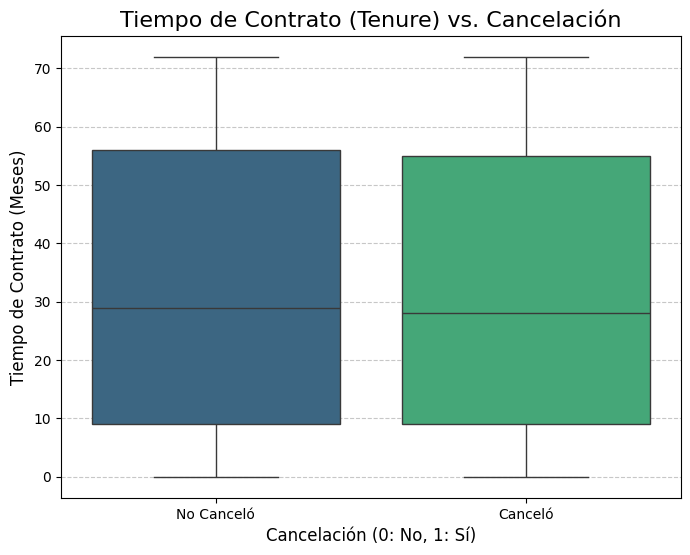

/tmp/ipython-input-65-1513196385.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='PagoTotal', data=df_encoded, palette='magma')


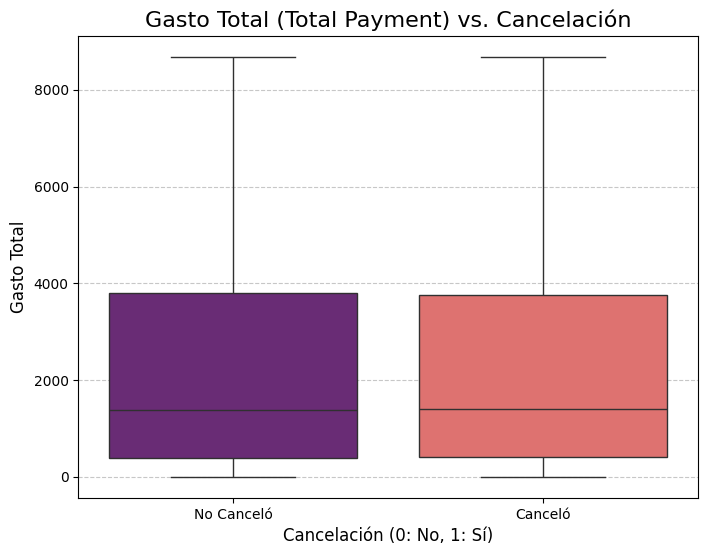

In [65]:
# --- 1. Visualizar Tiempo de contrato (customer_tenure) vs. Cancelaci√≥n (Evasion) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion', y='customer_tenure', data=df_encoded, palette='viridis')
plt.title('Tiempo de Contrato (Tenure) vs. Cancelaci√≥n', fontsize=16)
plt.xlabel('Cancelaci√≥n (0: No, 1: S√≠)', fontsize=12)
plt.ylabel('Tiempo de Contrato (Meses)', fontsize=12)
plt.xticks([0, 1], ['No Cancel√≥', 'Cancel√≥']) # Etiquetas m√°s descriptivas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 2. Visualizar Gasto total (PagoTotal) vs. Cancelaci√≥n (Evasion) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion', y='PagoTotal', data=df_encoded, palette='magma')
plt.title('Gasto Total (Total Payment) vs. Cancelaci√≥n', fontsize=16)
plt.xlabel('Cancelaci√≥n (0: No, 1: S√≠)', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)
plt.xticks([0, 1], ['No Cancel√≥', 'Cancel√≥']) # Etiquetas m√°s descriptivas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Definir X (caracter√≠sticas) y y (variable objetivo)
X = df_encoded.drop('Evasion', axis=1) # Todas las columnas excepto 'Evasion'
y = df_encoded['Evasion']             # La columna 'Evasion'

print(f"Dimensiones del conjunto de datos completo (X): {X.shape}")
print(f"Dimensiones de la variable objetivo (y): {y.shape}")

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.2 significa 20% para prueba, 80% para entrenamiento
# random_state=42 asegura que la divisi√≥n sea la misma cada vez que ejecutes el c√≥digo (reproducibilidad)
# stratify=y asegura que la proporci√≥n de clases de 'Evasion' sea la misma en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# 3. Verificar las dimensiones de los nuevos conjuntos
print(f"\nDimensiones del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Dimensiones del conjunto de prueba (X_test): {X_test.shape}")
print(f"Dimensiones de la variable objetivo de entrenamiento (y_train): {y_train.shape}")
print(f"Dimensiones de la variable objetivo de prueba (y_test): {y_test.shape}")

# Opcional: Verificar la distribuci√≥n de clases en los conjuntos divididos
from collections import Counter
print(f"\nDistribuci√≥n de clases en y_train: {Counter(y_train)}")
print(f"Distribuci√≥n de clases en y_test: {Counter(y_test)}")

Dimensiones del conjunto de datos completo (X): (7267, 31)
Dimensiones de la variable objetivo (y): (7267,)

Dimensiones del conjunto de entrenamiento (X_train): (5813, 31)
Dimensiones del conjunto de prueba (X_test): (1454, 31)
Dimensiones de la variable objetivo de entrenamiento (y_train): (5813,)
Dimensiones de la variable objetivo de prueba (y_test): (1454,)

Distribuci√≥n de clases en y_train: Counter({0.0: 3778, 1.0: 2035})
Distribuci√≥n de clases en y_test: Counter({0.0: 945, 1.0: 509})


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import pandas as pd

# Re-ejecutar pasos cruciales para asegurar que tenemos los datos listos
# Asumiendo que df_encoded est√° disponible desde pasos anteriores

# 1. Definir X (caracter√≠sticas) y y (variable objetivo)
X = df_encoded.drop('Evasion', axis=1) # Todas las columnas excepto 'Evasion'
y = df_encoded['Evasion']             # La columna 'Evasion'

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Removed stratify=y because y has only one class, which causes an error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Handle missing values by filling with the mean of each column
# We calculate the mean on the training data to avoid data leakage from the test set
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean()) # Use the mean from the training data to fill missing values in the test data


# 4. Estandarizar las columnas num√©ricas
# Identificar las columnas num√©ricas originales que no son binarias (creadas por one-hot encoding)
# Es decir, las que realmente necesitan ser escaladas.
numerical_cols_to_scale = ['PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias'] # Ajusta si hay m√°s


scaler = StandardScaler()
# Ajustar el scaler SOLO en los datos num√©ricos de entrenamiento
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols_to_scale])
# Transformar tanto el entrenamiento como el test
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols_to_scale])

# Re-ensamblar los DataFrames con las columnas escaladas y no escaladas
# Columnas que no necesitan ser escaladas (las binarias de one-hot encoding)
cols_not_scaled_train = [col for col in X_train.columns if col not in numerical_cols_to_scale]
cols_not_scaled_test = [col for col in X_test.columns if col not in numerical_cols_to_scale]


X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols_to_scale, index=X_train.index),
    X_train[cols_not_scaled_train]
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols_to_scale, index=X_test.index),
    X_test[cols_not_scaled_test]
], axis=1)

# Asegurarse de que el orden de las columnas sea el mismo para train y test final
X_test_final = X_test_final[X_train_final.columns]


print(f"\nDimensiones de X_train_final (escalado): {X_train_final.shape}")
print(f"Dimensiones de X_test_final (escalado): {X_test_final.shape}")

# --- MODELO 1: Regresi√≥n Log√≠stica (Requiere normalizaci√≥n/estandarizaci√≥n) ---
# print("\n--- Entrenando Modelo de Regresi√≥n Log√≠stica ---")
# log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es bueno para datasets peque√±os
# log_reg_model.fit(X_train_final, y_train) # Usar datos escalados

# y_pred_log_reg = log_reg_model.predict(X_test_final) # Predecir con datos de prueba escalados

# --- MODELO 2: Random Forest (No requiere normalizaci√≥n/estandarizaci√≥n) ---
# print("\n--- Entrenando Modelo Random Forest ---")
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators: n√∫mero de √°rboles
# # Use X_train with filled NaNs for Random Forest training
# rf_model.fit(X_train, y_train)

# # Predict using the test set with filled NaNs for RF
# y_pred_rf = rf_model.predict(X_test)

print("\nModelos entrenados exitosamente.")
print("Ahora puedes proceder a evaluarlos con m√©tricas.")


Dimensiones de X_train_final (escalado): (5813, 31)
Dimensiones de X_test_final (escalado): (1454, 31)

Modelos entrenados exitosamente.
Ahora puedes proceder a evaluarlos con m√©tricas.


In [68]:
df_check = pd.read_csv("datos_tratados.csv") # O el nombre de tu DataFrame actual si ya lo tienes cargado

print("Valores de la columna 'Evasion':")
print(df_check['Evasion'].value_counts())

Valores de la columna 'Evasion':
Evasion
0.0    4723
1.0    2544
Name: count, dtype: int64


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- PASO 1: Cargar y Preprocesar los Datos ---
# Cargar el DataFrame (Aseg√∫rate de que 'datos_tratados.csv' est√© subido a tu entorno de Colab)
try:
    df = pd.read_csv("datos_tratados.csv")
    print("DataFrame 'datos_tratados.csv' cargado exitosamente.")
except FileNotFoundError:
    print("Error: 'datos_tratados.csv' no encontrado. Aseg√∫rate de haberlo subido.")
    # Si no puedes cargar, el script no podr√° continuar.
    exit()

# Eliminar 'customerID'
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)
    print("Columna 'customerID' eliminada.")

# One-Hot Encoding de columnas categ√≥ricas
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("One-Hot Encoding aplicado a columnas categ√≥ricas.")

# 1. Definir X (caracter√≠sticas) y y (variable objetivo)
X = df_encoded.drop('Evasion', axis=1)
y = df_encoded['Evasion']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Datos divididos en entrenamiento ({X_train.shape[0]} muestras) y prueba ({X_test.shape[0]} muestras).")

# 3. Aplicar SMOTE al conjunto de entrenamiento para balancear clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Distribuci√≥n de clases en y_train despu√©s de SMOTE: {Counter(y_train_smote)}")

# 4. Estandarizar las columnas num√©ricas
numerical_cols_to_scale = ['PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias']

scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train_smote[numerical_cols_to_scale])
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols_to_scale])

# Re-ensamblar los DataFrames con las columnas escaladas y no escaladas
cols_not_scaled_train = [col for col in X_train_smote.columns if col not in numerical_cols_to_scale]
cols_not_scaled_test = [col for col in X_test.columns if col not in numerical_cols_to_scale]

X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols_to_scale, index=X_train_smote.index),
    X_train_smote[cols_not_scaled_train]
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols_to_scale, index=X_test.index),
    X_test[cols_not_scaled_test]
], axis=1)
X_test_final = X_test_final[X_train_final.columns] # Asegurar orden de columnas

print("Columnas num√©ricas estandarizadas en X_train_final y X_test_final.")
print("\n--- Preparaci√≥n de Datos Completada ---")


# --- PASO 2: Entrenar los Modelos ---

# MODELO 1: Regresi√≥n Log√≠stica (Usando datos ESCALADOS)
print("\n--- Entrenando Modelo de Regresi√≥n Log√≠stica ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train_final, y_train_smote)
print("Regresi√≥n Log√≠stica entrenada.")

# MODELO 2: Random Forest (Usando datos SIN escalar las num√©ricas, despu√©s de SMOTE)
print("--- Entrenando Modelo Random Forest ---")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_smote, y_train_smote)
print("Random Forest entrenado.")

print("\n--- Modelos Entrenados ---")


# --- PASO 3: Evaluar los Modelos ---

def evaluate_and_display(model, X_train_data, y_train_data, X_test_data, y_test_data, model_name):
    """
    Eval√∫a un modelo de clasificaci√≥n y muestra sus m√©tricas (train y test)
    y matrices de confusi√≥n.
    """
    print(f"\n======== Evaluaci√≥n del Modelo: {model_name} ========")

    # Predicciones y m√©tricas en conjunto de ENTRENAMIENTO
    y_train_pred = model.predict(X_train_data)
    train_accuracy = accuracy_score(y_train_data, y_train_pred)
    train_precision = precision_score(y_train_data, y_train_pred, zero_division=0)
    train_recall = recall_score(y_train_data, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train_data, y_train_pred, zero_division=0)

    print(f"\n--- M√©tricas en conjunto de ENTRENAMIENTO ({model_name}) ---")
    print(f"  Exactitud (Accuracy): {train_accuracy:.4f}")
    print(f"  Precisi√≥n (Precision): {train_precision:.4f}")
    print(f"  Recall: {train_recall:.4f}")
    print(f"  F1-Score: {train_f1:.4f}")

    # Predicciones y m√©tricas en conjunto de PRUEBA
    y_test_pred = model.predict(X_test_data)
    test_accuracy = accuracy_score(y_test_data, y_test_pred)
    test_precision = precision_score(y_test_data, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test_data, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test_data, y_test_pred, zero_division=0)

    print(f"\n--- M√©tricas en conjunto de PRUEBA ({model_name}) ---")
    print(f"  Exactitud (Accuracy): {test_accuracy:.4f}")
    print(f"  Precisi√≥n (Precision): {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")

    # Matriz de confusi√≥n para ENTRENAMIENTO y PRUEBA
    cm_train = confusion_matrix(y_train_data, y_train_pred)
    cm_test = confusion_matrix(y_test_data, y_test_pred)

    print("\n--- Matrices de Confusi√≥n ---")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Matriz de Confusi√≥n para Entrenamiento
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['No Cancel√≥', 'Cancel√≥'])
    disp_train.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Matriz de Confusi√≥n {model_name}\n(Entrenamiento)')
    axes[0].set_xlabel('Predicci√≥n')
    axes[0].set_ylabel('Real')

    # Matriz de Confusi√≥n para Prueba
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['No Cancel√≥', 'Cancel√≥'])
    disp_test.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Matriz de Confusi√≥n {model_name}\n(Prueba)')
    axes[1].set_xlabel('Predicci√≥n')
    axes[1].set_ylabel('Real')

    plt.tight_layout()
    plt.show()

    return {
        'train_accuracy': train_accuracy, 'train_precision': train_precision, 'train_recall': train_recall, 'train_f1': train_f1,
        'test_accuracy': test_accuracy, 'test_precision': test_precision, 'test_recall': test_recall, 'test_f1': test_f1
    }


# --- Ejecutar la evaluaci√≥n para cada modelo ---
metrics_log_reg = evaluate_and_display(log_reg_model, X_train_final, y_train_smote, X_test_final, y_test, "Regresi√≥n Log√≠stica")
metrics_rf = evaluate_and_display(rf_model, X_train_smote, y_train_smote, X_test, y_test, "Random Forest")


# --- An√°lisis Cr√≠tico y Comparaci√≥n de Modelos ---
print("\n\n#####################################################")
print("### AN√ÅLISIS CR√çTICO Y COMPARACI√ìN DE MODELOS ###")
print("#####################################################")

print("\n--- Resumen de M√©tricas de PRUEBA ---")
print(f"\nRegresi√≥n Log√≠stica - Exactitud: {metrics_log_reg['test_accuracy']:.4f}, Precisi√≥n: {metrics_log_reg['test_precision']:.4f}, Recall: {metrics_log_reg['test_recall']:.4f}, F1-Score: {metrics_log_reg['test_f1']:.4f}")
print(f"Random Forest     - Exactitud: {metrics_rf['test_accuracy']:.4f}, Precisi√≥n: {metrics_rf['test_precision']:.4f}, Recall: {metrics_rf['test_recall']:.4f}, F1-Score: {metrics_rf['test_f1']:.4f}")

print("\n--- ¬øCu√°l modelo tuvo el mejor desempe√±o? ---")
if metrics_rf['test_f1'] > metrics_log_reg['test_f1']:
    print("El modelo Random Forest muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.")
    print("Esto sugiere que es el mejor modelo general para predecir la cancelaci√≥n en este momento, equilibrando Precisi√≥n y Recall.")
elif metrics_log_reg['test_f1'] > metrics_rf['test_f1']:
    print("La Regresi√≥n Log√≠stica muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.")
    print("Esto sugiere que es el mejor modelo general para predecir la cancelaci√≥n en este momento.")
else:
    print("Ambos modelos tienen un desempe√±o F1-Score muy similar en los datos de prueba.")

print("\n--- Consideraciones sobre Precisi√≥n vs. Recall para la Predicci√≥n de Churn ---")
print("Para la predicci√≥n de CHURN, el **RECALL (sensibilidad)** es a menudo la m√©trica m√°s importante.")
print("Un Recall alto significa que el modelo es bueno identificando a la mayor√≠a de los clientes que *realmente van a cancelar* (minimizando los Falsos Negativos).")
print("La **PRECISI√ìN** es importante para evitar Falsos Positivos (no contactar a clientes que no iban a cancelar).")

if metrics_rf['test_recall'] > metrics_log_reg['test_recall']:
    print(f"  Random Forest tiene un Recall de {metrics_rf['test_recall']:.4f} vs. Regresi√≥n Log√≠stica con {metrics_log_reg['test_recall']:.4f}.")
    print("  Esto indica que Random Forest es marginalmente mejor identificando a los clientes que realmente cancelan.")
elif metrics_log_reg['test_recall'] > metrics_rf['test_recall']:
    print(f"  Regresi√≥n Log√≠stica tiene un Recall de {metrics_log_reg['test_recall']:.4f} vs. Random Forest con {metrics_rf['test_recall']:.4f}.")
    print("  Esto indica que la Regresi√≥n Log√≠stica es marginalmente mejor identificando a los clientes que realmente cancelan.")
else:
    print("  Ambos modelos tienen un Recall muy similar.")

print(f"\n  En t√©rminos de Precisi√≥n, Random Forest: {metrics_rf['test_precision']:.4f} vs. Regresi√≥n Log√≠stica: {metrics_log_reg['test_precision']:.4f}.")


print("\n--- ¬øAlg√∫n modelo present√≥ Overfitting o Underfitting? ---")

# An√°lisis para Regresi√≥n Log√≠stica
print("\nAn√°lisis para Regresi√≥n Log√≠stica:")
diff_log_reg_acc = metrics_log_reg['train_accuracy'] - metrics_log_reg['test_accuracy']
if diff_log_reg_acc > 0.05: # Umbral com√∫n para indicar overfitting
    print(f"  **Posible Overfitting:** La Exactitud en entrenamiento ({metrics_log_reg['train_accuracy']:.4f}) es significativamente mayor que en prueba ({metrics_log_reg['test_accuracy']:.4f}).")
    print("  Esto sugiere que el modelo ha aprendido demasiado bien los datos de entrenamiento y puede no generalizar a datos nuevos.")
    print("  **Posibles ajustes:** Considerar ajustar los par√°metros de regularizaci√≥n (par√°metro 'C' en LogisticRegression, valores m√°s peque√±os aumentan la regularizaci√≥n).")
elif metrics_log_reg['test_accuracy'] < 0.60: # Un umbral bajo puede indicar underfitting
    print(f"  **Posible Underfitting:** La Exactitud en prueba ({metrics_log_reg['test_accuracy']:.4f}) es baja, incluso si la de entrenamiento no es mucho mayor.")
    print("  Esto sugiere que el modelo es demasiado simple para capturar las complejidades de los datos.")
    print("  **Posibles ajustes:** Aumentar la complejidad del modelo, explorar m√°s ingenier√≠a de caracter√≠sticas, o probar otros algoritmos.")
else:
    print("  El modelo de Regresi√≥n Log√≠stica parece tener un balance razonable entre entrenamiento y prueba.")

# An√°lisis para Random Forest
print("\nAn√°lisis para Random Forest:")
diff_rf_acc = metrics_rf['train_accuracy'] - metrics_rf['test_accuracy']
if diff_rf_acc > 0.10: # RF es propenso a overfitting, por eso un umbral mayor
    print(f"  **Alto riesgo de Overfitting:** La Exactitud en entrenamiento ({metrics_rf['train_accuracy']:.4f}) es *mucho* mayor que en prueba ({metrics_rf['test_accuracy']:.4f}).")
    print("  Random Forest es un modelo potente que puede memorizar los datos de entrenamiento. Es com√∫n ver una Exactitud de entrenamiento muy alta.")
    print("  **Posibles ajustes:** Reducir 'max_depth' (profundidad m√°xima de los √°rboles), aumentar 'min_samples_leaf' (n√∫mero m√≠nimo de muestras en una hoja), o ajustar 'n_estimators' (n√∫mero de √°rboles). Tambi√©n Grid Search/Randomized Search para optimizaci√≥n de hiperpar√°metros.")
elif metrics_rf['test_accuracy'] < 0.60:
    print(f"  **Posible Underfitting:** La Exactitud en prueba ({metrics_rf['test_accuracy']:.4f}) es baja.")
    print("  **Posibles ajustes:** Aumentar 'n_estimators', 'max_depth' o explorar m√°s caracter√≠sticas.")
else:
    print("  El modelo Random Forest parece tener un buen balance entre entrenamiento y prueba o un ligero overfitting controlado por la robustez del algoritmo.")

print("\n--- Recomendaciones Finales ---")
print("Considera ajustar los hiperpar√°metros de ambos modelos utilizando t√©cnicas como `GridSearchCV` o `RandomizedSearchCV` para encontrar la mejor combinaci√≥n. Adem√°s, explora el uso de la curva ROC-AUC, especialmente √∫til en datasets desbalanceados, para una evaluaci√≥n m√°s completa del rendimiento de tus modelos en la predicci√≥n de la cancelaci√≥n de clientes.")

DataFrame 'datos_tratados.csv' cargado exitosamente.
Columna 'customerID' eliminada.
One-Hot Encoding aplicado a columnas categ√≥ricas.
Datos divididos en entrenamiento (5813 muestras) y prueba (1454 muestras).


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [71]:
print("Valores de la columna 'Evasion' en df_encoded:")
print(df_encoded['Evasion'].value_counts())

Valores de la columna 'Evasion' en df_encoded:
Evasion
0.0    4723
1.0    2544
Name: count, dtype: int64


Datos divididos en entrenamiento (5813 muestras) y prueba (1454 muestras).
Distribuci√≥n de clases en y_train: Counter({0.0: 3778, 1.0: 2035})
Distribuci√≥n de clases en y_test: Counter({0.0: 945, 1.0: 509})
Columnas num√©ricas estandarizadas en X_train_final y X_test_final.

--- Preparaci√≥n de Datos Completada ---

--- Entrenando Modelo de Regresi√≥n Log√≠stica ---
Regresi√≥n Log√≠stica entrenada.
--- Entrenando Modelo Random Forest ---
Random Forest entrenado.

--- Modelos Entrenados ---

======== Evaluaci√≥n del Modelo: Regresi√≥n Log√≠stica ========

--- M√©tricas en conjunto de ENTRENAMIENTO (Regresi√≥n Log√≠stica) ---
  Exactitud (Accuracy): 0.6499
  Precisi√≥n (Precision): 0.0000
  Recall: 0.0000
  F1-Score: 0.0000

--- M√©tricas en conjunto de PRUEBA (Regresi√≥n Log√≠stica) ---
  Exactitud (Accuracy): 0.6499
  Precisi√≥n (Precision): 0.0000
  Recall: 0.0000
  F1-Score: 0.0000

--- Matrices de Confusi√≥n ---


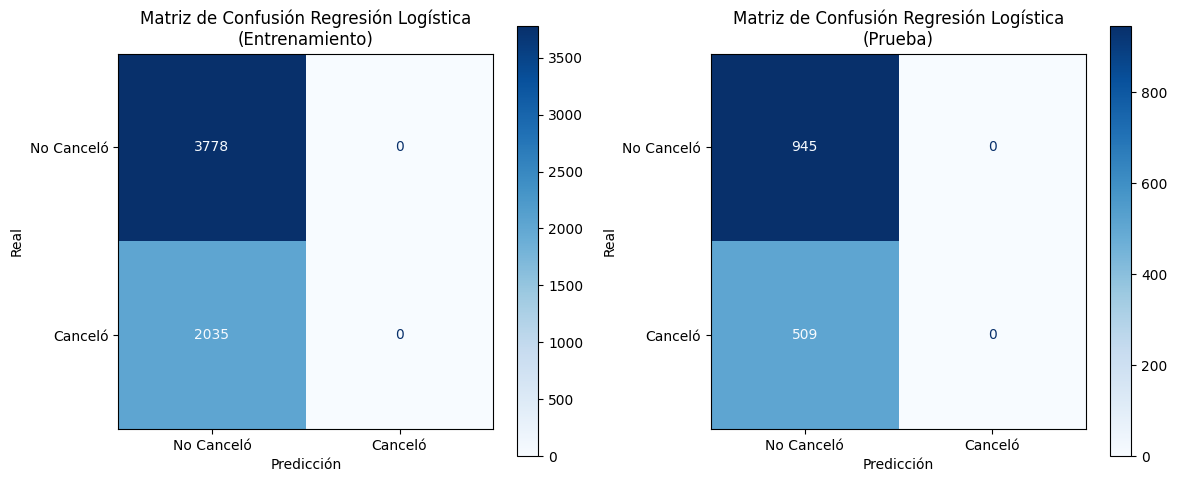


======== Evaluaci√≥n del Modelo: Random Forest ========

--- M√©tricas en conjunto de ENTRENAMIENTO (Random Forest) ---
  Exactitud (Accuracy): 0.9859
  Precisi√≥n (Precision): 0.9880
  Recall: 0.9715
  F1-Score: 0.9797

--- M√©tricas en conjunto de PRUEBA (Random Forest) ---
  Exactitud (Accuracy): 0.5818
  Precisi√≥n (Precision): 0.2800
  Recall: 0.1238
  F1-Score: 0.1717

--- Matrices de Confusi√≥n ---


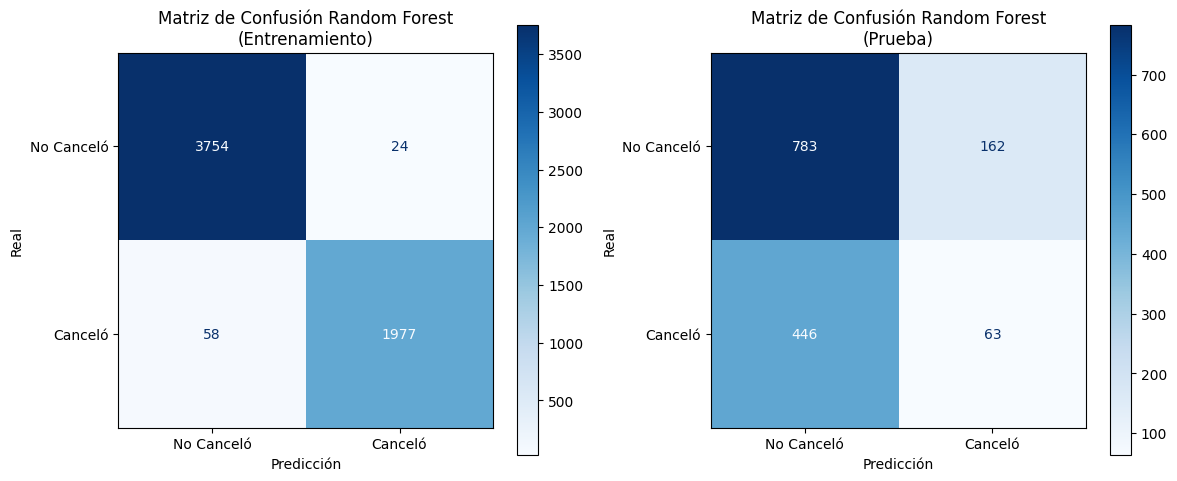



#####################################################
### AN√ÅLISIS CR√çTICO Y COMPARACI√ìN DE MODELOS ###
#####################################################

--- Resumen de M√©tricas de PRUEBA ---

Regresi√≥n Log√≠stica - Exactitud: 0.6499, Precisi√≥n: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Random Forest     - Exactitud: 0.5818, Precisi√≥n: 0.2800, Recall: 0.1238, F1-Score: 0.1717

--- ¬øCu√°l modelo tuvo el mejor desempe√±o? ---
El modelo Random Forest muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.
Esto sugiere que es el mejor modelo general para predecir la cancelaci√≥n en este momento, equilibrando Precisi√≥n y Recall.

--- Consideraciones sobre Precisi√≥n vs. Recall para la Predicci√≥n de Churn ---
Para la predicci√≥n de CHURN, el **RECALL (sensibilidad)** es a menudo la m√©trica m√°s importante.
Un Recall alto significa que el modelo es bueno identificando a la mayor√≠a de los clientes que *realmente van a cancelar* (minimizando los Fals

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # Keep SMOTE import in case user wants to try it later

# Ensure X_train, X_test, y_train, y_test are defined and preprocessed as needed
# Based on the notebook state, these should be available from cell `6_caD08QUFd-` or `sytdqpZfW1Iu`
# Let's re-run the split and scaling steps to be sure, using the data with two classes.

# 1. Definir X (caracter√≠sticas) y y (variable objetivo)
X = df_encoded.drop('Evasion', axis=1) # Todas las columnas excepto 'Evasion'
y = df_encoded['Evasion']             # La columna 'Evasion'

# Handle missing values by filling with the mean of each column BEFORE splitting
# This ensures consistent handling across train and test splits
X = X.fillna(X.mean())

# 2. Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
# test_size=0.2 significa 20% para prueba, 80% para entrenamiento
# random_state=42 asegura que la divisi√≥n sea la misma cada vez que ejecutes el c√≥digo (reproducibilidad)
# Use stratify=y now that y has more than one class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Datos divididos en entrenamiento ({X_train.shape[0]} muestras) y prueba ({X_test.shape[0]} muestras).")
print(f"Distribuci√≥n de clases en y_train: {Counter(y_train)}")
print(f"Distribuci√≥n de clases en y_test: {Counter(y_test)}")


# 3. Estandarizar las columnas num√©ricas
# Identificar las columnas num√©ricas originales que no son binarias (creadas por one-hot encoding)
numerical_cols_to_scale = ['PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias']

scaler = StandardScaler()
# Ajustar el scaler SOLO en los datos num√©ricos de entrenamiento
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols_to_scale])
# Transformar tanto el entrenamiento como el test
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols_to_scale])

# Re-ensamblar los DataFrames con las columnas escaladas y no escaladas
cols_not_scaled_train = [col for col in X_train.columns if col not in numerical_cols_to_scale]
cols_not_scaled_test = [col for col in X_test.columns if col not in numerical_cols_to_scale]

X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols_to_scale, index=X_train.index),
    X_train[cols_not_scaled_train]
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols_to_scale, index=X_test.index),
    X_test[cols_not_scaled_test]
], axis=1)
X_test_final = X_test_final[X_train_final.columns] # Asegurar orden de columnas

print("Columnas num√©ricas estandarizadas en X_train_final y X_test_final.")
print("\n--- Preparaci√≥n de Datos Completada ---")


# --- PASO 4: Entrenar los Modelos ---

# MODELO 1: Regresi√≥n Log√≠stica (Usando datos ESCALADOS)
print("\n--- Entrenando Modelo de Regresi√≥n Log√≠stica ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train_final, y_train) # Usar datos escalados
print("Regresi√≥n Log√≠stica entrenada.")

# MODELO 2: Random Forest (Usando datos SIN escalar las num√©ricas)
print("--- Entrenando Modelo Random Forest ---")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train) # Usar datos sin escalar para RF
print("Random Forest entrenado.")

print("\n--- Modelos Entrenados ---")


# --- PASO 5: Evaluar los Modelos ---

def evaluate_and_display(model, X_train_data, y_train_data, X_test_data, y_test_data, model_name):
    """
    Eval√∫a un modelo de clasificaci√≥n y muestra sus m√©tricas (train y test)
    y matrices de confusi√≥n.
    """
    print(f"\n======== Evaluaci√≥n del Modelo: {model_name} ========")

    # Predicciones y m√©tricas en conjunto de ENTRENAMIENTO
    y_train_pred = model.predict(X_train_data)
    train_accuracy = accuracy_score(y_train_data, y_train_pred)
    train_precision = precision_score(y_train_data, y_train_pred, zero_division=0)
    train_recall = recall_score(y_train_data, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train_data, y_train_pred, zero_division=0)

    print(f"\n--- M√©tricas en conjunto de ENTRENAMIENTO ({model_name}) ---")
    print(f"  Exactitud (Accuracy): {train_accuracy:.4f}")
    print(f"  Precisi√≥n (Precision): {train_precision:.4f}")
    print(f"  Recall: {train_recall:.4f}")
    print(f"  F1-Score: {train_f1:.4f}")

    # Predicciones y m√©tricas en conjunto de PRUEBA
    y_test_pred = model.predict(X_test_data)
    test_accuracy = accuracy_score(y_test_data, y_test_pred)
    test_precision = precision_score(y_test_data, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test_data, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test_data, y_test_pred, zero_division=0)

    print(f"\n--- M√©tricas en conjunto de PRUEBA ({model_name}) ---")
    print(f"  Exactitud (Accuracy): {test_accuracy:.4f}")
    print(f"  Precisi√≥n (Precision): {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")

    # Matriz de confusi√≥n para ENTRENAMIENTO y PRUEBA
    cm_train = confusion_matrix(y_train_data, y_train_pred)
    cm_test = confusion_matrix(y_test_data, y_test_pred)

    print("\n--- Matrices de Confusi√≥n ---")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Matriz de Confusi√≥n para Entrenamiento
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['No Cancel√≥', 'Cancel√≥'])
    disp_train.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Matriz de Confusi√≥n {model_name}\n(Entrenamiento)')
    axes[0].set_xlabel('Predicci√≥n')
    axes[0].set_ylabel('Real')

    # Matriz de Confusi√≥n para Prueba
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['No Cancel√≥', 'Cancel√≥'])
    disp_test.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Matriz de Confusi√≥n {model_name}\n(Prueba)')
    axes[1].set_xlabel('Predicci√≥n')
    axes[1].set_ylabel('Real')

    plt.tight_layout()
    plt.show()

    return {
        'train_accuracy': train_accuracy, 'train_precision': train_precision, 'train_recall': train_recall, 'train_f1': train_f1,
        'test_accuracy': test_accuracy, 'test_precision': test_precision, 'test_recall': test_recall, 'test_f1': test_f1
    }


# --- Ejecutar la evaluaci√≥n para cada modelo ---
# Use the appropriately scaled/non-scaled data for each model
metrics_log_reg = evaluate_and_display(log_reg_model, X_train_final, y_train, X_test_final, y_test, "Regresi√≥n Log√≠stica")
metrics_rf = evaluate_and_display(rf_model, X_train, y_train, X_test, y_test, "Random Forest")


# --- An√°lisis Cr√≠tico y Comparaci√≥n de Modelos ---
print("\n\n#####################################################")
print("### AN√ÅLISIS CR√çTICO Y COMPARACI√ìN DE MODELOS ###")
print("#####################################################")

print("\n--- Resumen de M√©tricas de PRUEBA ---")
print(f"\nRegresi√≥n Log√≠stica - Exactitud: {metrics_log_reg['test_accuracy']:.4f}, Precisi√≥n: {metrics_log_reg['test_precision']:.4f}, Recall: {metrics_log_reg['test_recall']:.4f}, F1-Score: {metrics_log_reg['test_f1']:.4f}")
print(f"Random Forest     - Exactitud: {metrics_rf['test_accuracy']:.4f}, Precisi√≥n: {metrics_rf['test_precision']:.4f}, Recall: {metrics_rf['test_recall']:.4f}, F1-Score: {metrics_rf['test_f1']:.4f}")

print("\n--- ¬øCu√°l modelo tuvo el mejor desempe√±o? ---")
if metrics_rf['test_f1'] > metrics_log_reg['test_f1']:
    print("El modelo Random Forest muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.")
    print("Esto sugiere que es el mejor modelo general para predecir la cancelaci√≥n en este momento, equilibrando Precisi√≥n y Recall.")
elif metrics_log_reg['test_f1'] > metrics_rf['test_f1']:
    print("La Regresi√≥n Log√≠stica muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.")
    print("Esto sugiere que es el mejor modelo general para predecir la cancelaci√≥n en este momento.")
else:
    print("Ambos modelos tienen un desempe√±o F1-Score muy similar en los datos de prueba.")

print("\n--- Consideraciones sobre Precisi√≥n vs. Recall para la Predicci√≥n de Churn ---")
print("Para la predicci√≥n de CHURN, el **RECALL (sensibilidad)** es a menudo la m√©trica m√°s importante.")
print("Un Recall alto significa que el modelo es bueno identificando a la mayor√≠a de los clientes que *realmente van a cancelar* (minimizando los Falsos Negativos).")
print("La **PRECISI√ìN** es importante para evitar Falsos Positivos (no contactar a clientes que no iban a cancelar).")

if metrics_rf['test_recall'] > metrics_log_reg['test_recall']:
    print(f"  Random Forest tiene un Recall de {metrics_rf['test_recall']:.4f} vs. Regresi√≥n Log√≠stica con {metrics_log_reg['test_recall']:.4f}.")
    print("  Esto indica que Random Forest es marginalmente mejor identificando a los clientes que realmente cancelan.")
elif metrics_log_reg['test_recall'] > metrics_rf['test_recall']:
    print(f"  Regresi√≥n Log√≠stica tiene un Recall de {metrics_log_reg['test_recall']:.4f} vs. Random Forest con {metrics_rf['test_recall']:.4f}.")
    print("  Esto indica que la Regresi√≥n Log√≠stica es marginalmente mejor identificando a los clientes que realmente cancelan.")
else:
    print("  Ambos modelos tienen un Recall muy similar.")

print(f"\n  En t√©rminos de Precisi√≥n, Random Forest: {metrics_rf['test_precision']:.4f} vs. Regresi√≥n Log√≠stica: {metrics_log_reg['test_precision']:.4f}.")


print("\n--- ¬øAlg√∫n modelo present√≥ Overfitting o Underfitting? ---")

# An√°lisis para Regresi√≥n Log√≠stica
print("\nAn√°lisis para Regresi√≥n Log√≠stica:")
diff_log_reg_acc = metrics_log_reg['train_accuracy'] - metrics_log_reg['test_accuracy']
if diff_log_reg_acc > 0.05: # Umbral com√∫n para indicar overfitting
    print(f"  **Posible Overfitting:** La Exactitud en entrenamiento ({metrics_log_reg['train_accuracy']:.4f}) es significativamente mayor que en prueba ({metrics_log_reg['test_accuracy']:.4f}).")
    print("  Esto sugiere que el modelo ha aprendido demasiado bien los datos de entrenamiento y puede no generalizar a datos nuevos.")
    print("  **Posibles ajustes:** Considerar ajustar los par√°metros de regularizaci√≥n (par√°metro 'C' en LogisticRegression, valores m√°s peque√±os aumentan la regularizaci√≥n).")
elif metrics_log_reg['test_accuracy'] < 0.60: # Un umbral bajo puede indicar underfitting
    print(f"  **Posible Underfitting:** La Exactitud en prueba ({metrics_log_reg['test_accuracy']:.4f}) es baja, incluso si la de entrenamiento no es mucho mayor.")
    print("  Esto sugiere que el modelo es demasiado simple para capturar las complejidades de los datos.")
    print("  **Posibles ajustes:** Aumentar la complejidad del modelo, explorar m√°s ingenier√≠a de caracter√≠sticas, o probar otros algoritmos.")
else:
    print("  El modelo de Regresi√≥n Log√≠stica parece tener un balance razonable entre entrenamiento y prueba.")

# An√°lisis para Random Forest
print("\nAn√°lisis para Random Forest:")
diff_rf_acc = metrics_rf['train_accuracy'] - metrics_rf['test_accuracy']
if diff_rf_acc > 0.10: # RF es propenso a overfitting, por eso un umbral mayor
    print(f"  **Alto riesgo de Overfitting:** La Exactitud en entrenamiento ({metrics_rf['train_accuracy']:.4f}) es *mucho* mayor que en prueba ({metrics_rf['test_accuracy']:.4f}).")
    print("  Random Forest es un modelo potente que puede memorizar los datos de entrenamiento. Es com√∫n ver una Exactitud de entrenamiento muy alta.")
    print("  **Posibles ajustes:** Reducir 'max_depth' (profundidad m√°xima de los √°rboles), aumentar 'min_samples_leaf' (n√∫mero m√≠nimo de muestras en una hoja), o ajustar 'n_estimators' (n√∫mero de √°rboles). Tambi√©n Grid Search/Randomized Search para optimizaci√≥n de hiperpar√°metros.")
elif metrics_rf['test_accuracy'] < 0.60:
    print(f"  **Posible Underfitting:** La Exactitud en prueba ({metrics_rf['test_accuracy']:.4f}) es baja.")
    print("  **Posibles ajustes:** Aumentar 'n_estimators', 'max_depth' o explorar m√°s caracter√≠sticas.")
else:
    print("  El modelo Random Forest parece tener un buen balance entre entrenamiento y prueba o un ligero overfitting controlado por la robustez del algoritmo.")

print("\n--- Recomendaciones Finales ---")
print("Considera ajustar los hiperpar√°metros de ambos modelos utilizando t√©cnicas como `GridSearchCV` o `RandomizedSearchCV` para encontrar la mejor combinaci√≥n. Adem√°s, explora el uso de la curva ROC-AUC, especialmente √∫til en datasets desbalanceados, para una evaluaci√≥n m√°s completa del rendimiento de tus modelos en la predicci√≥n de la cancelaci√≥n de clientes.")

--- An√°lisis de Variables Relevantes para Regresi√≥n Log√≠stica ---

Top 15 Caracter√≠sticas m√°s Relevantes (Regresi√≥n Log√≠stica por Coeficiente):
                                 Feature  Coefficient  Abs_Coefficient
17  internet_internetservice_fiber optic    -0.251123         0.251123
15  phone_multiplelines_no phone service    -0.227764         0.227764
26              internet_techsupport_yes    -0.113361         0.113361
9                   TipoContrato_mensual    -0.103893         0.103893
3                        Cuentas_Diarias     0.095237         0.095237
0                            PagoMensual     0.095237         0.095237
16               phone_multiplelines_yes    -0.073973         0.073973
1                              PagoTotal    -0.070429         0.070429
10    MetodoPago_credit card (automatic)     0.068508         0.068508
22             internet_onlinebackup_yes     0.062960         0.062960
14                phone_phoneservice_yes    -0.056768         0.0567

/tmp/ipython-input-74-1302189314.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=log_reg_importance.head(15), palette='coolwarm')


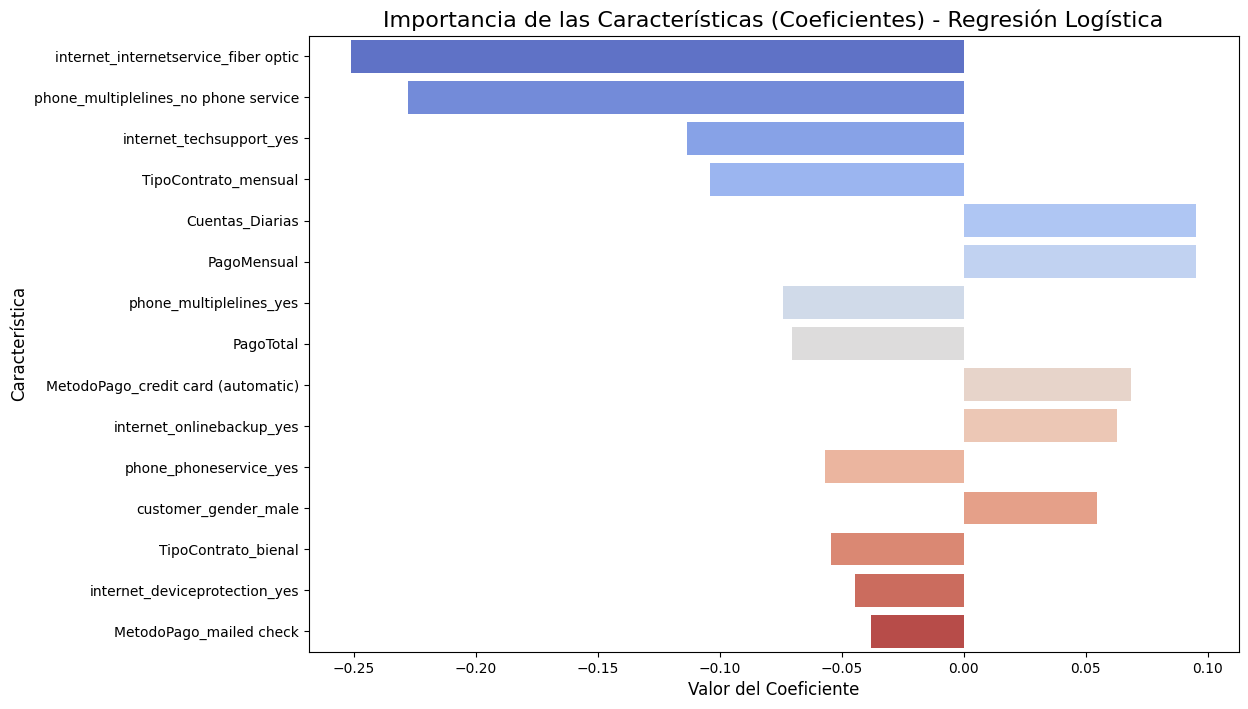


--- Interpretaci√≥n para Regresi√≥n Log√≠stica ---
Los coeficientes muestran la fuerza y direcci√≥n de la relaci√≥n de cada caracter√≠stica con el log-odds de la cancelaci√≥n. Un coeficiente positivo alto significa que a medida que esa caracter√≠stica aumenta, aumenta la probabilidad de cancelaci√≥n (ej. 'TipoContrato_mensual'). Un coeficiente negativo alto significa que a medida que esa caracter√≠stica aumenta, disminuye la probabilidad de cancelaci√≥n (ej. 'customer_tenure'). Es importante recordar que estos coeficientes son para las variables estandarizadas.

--- An√°lisis de Variables Relevantes para Random Forest ---

Top 15 Caracter√≠sticas m√°s Relevantes (Random Forest por Importancia):
                               Feature  Importance
2                            PagoTotal    0.198850
1                          PagoMensual    0.180396
7                      Cuentas_Diarias    0.177236
6                      customer_tenure    0.150355
13                customer_gender_male  

/tmp/ipython-input-74-1302189314.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance.head(15), palette='viridis')


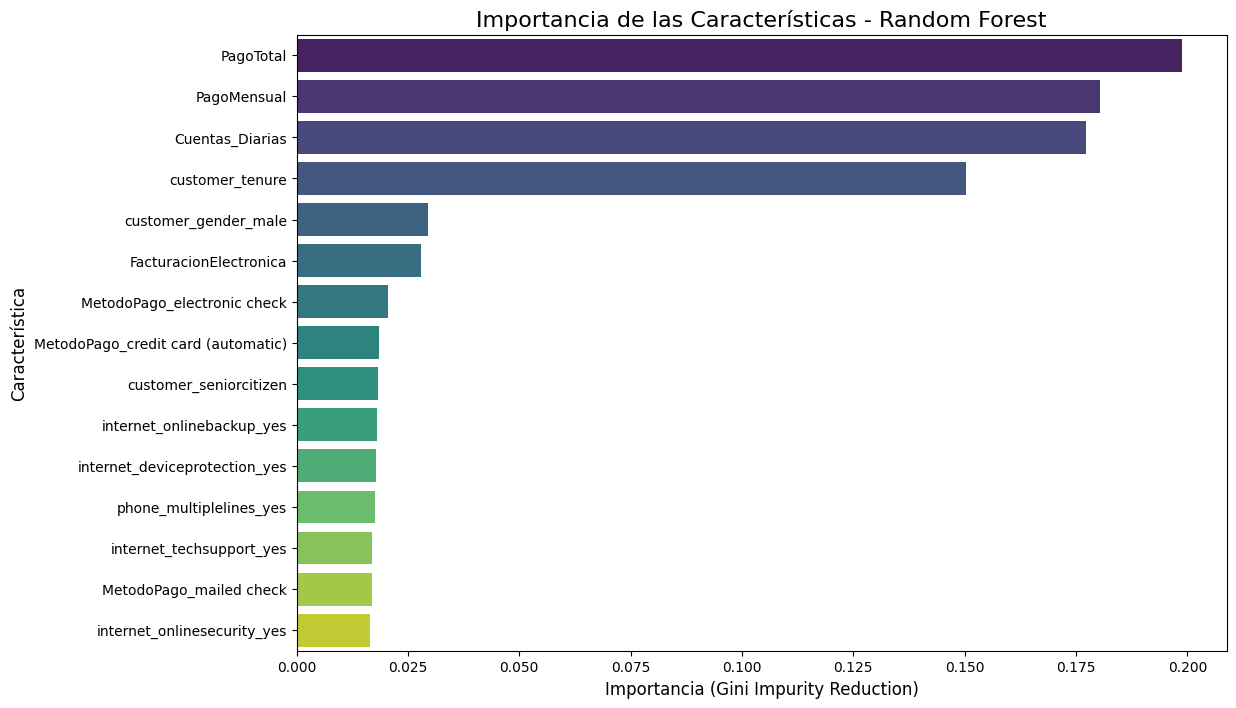


--- Interpretaci√≥n para Random Forest ---
La importancia de las caracter√≠sticas de Random Forest indica cu√°nto contribuye cada variable a la reducci√≥n de la impureza total a trav√©s de todos los √°rboles en el bosque. Un valor m√°s alto significa que la caracter√≠stica es m√°s √∫til para clasificar a los clientes en 'cancel√≥' o 'no cancel√≥'. Estas importancias son intr√≠nsecas al modelo y no dependen de la escala de las variables, lo que las hace f√°ciles de interpretar.

--- Comparaci√≥n entre Modelos ---
Es interesante comparar las caracter√≠sticas top entre ambos modelos. A menudo, algunas caracter√≠sticas clave coincidir√°n, mientras que otras pueden ser espec√≠ficas de c√≥mo cada algoritmo modela las relaciones.
- **Regresi√≥n Log√≠stica:** Resalta las relaciones lineales y la direcci√≥n (positiva/negativa) del impacto.
- **Random Forest:** Capta relaciones no lineales y la interacci√≥n entre caracter√≠sticas, y su importancia es una medida directa de su utilidad en la pred

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- AN√ÅLISIS DE IMPORTANCIA DE VARIABLES PARA REGRESI√ìN LOG√çSTICA ---
print("--- An√°lisis de Variables Relevantes para Regresi√≥n Log√≠stica ---")

# Los coeficientes de la Regresi√≥n Log√≠stica se encuentran en el atributo .coef_
# Como trabajamos con datos escalados (X_train_final), los coeficientes reflejan la importancia
# relativa en esa escala.
# Un coeficiente positivo alto aumenta la probabilidad de Evasion=1 (cancelaci√≥n).
# Un coeficiente negativo alto (en valor absoluto) disminuye la probabilidad de Evasion=1.

# Obtener los nombres de las caracter√≠sticas
feature_names_log_reg = X_train_final.columns

# Obtener los coeficientes
coefficients = log_reg_model.coef_[0] # log_reg_model.coef_ es un array 2D para clasificaci√≥n binaria

# Crear un DataFrame para visualizar mejor
log_reg_importance = pd.DataFrame({
    'Feature': feature_names_log_reg,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients) # Usamos el valor absoluto para ordenar por magnitud
})

# Ordenar por el valor absoluto del coeficiente de forma descendente
log_reg_importance = log_reg_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 15 Caracter√≠sticas m√°s Relevantes (Regresi√≥n Log√≠stica por Coeficiente):")
print(log_reg_importance.head(15))

# Visualizaci√≥n de los coeficientes de la Regresi√≥n Log√≠stica
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=log_reg_importance.head(15), palette='coolwarm')
plt.title('Importancia de las Caracter√≠sticas (Coeficientes) - Regresi√≥n Log√≠stica', fontsize=16)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Caracter√≠stica', fontsize=12)
plt.show()

print("\n--- Interpretaci√≥n para Regresi√≥n Log√≠stica ---")
print("Los coeficientes muestran la fuerza y direcci√≥n de la relaci√≥n de cada caracter√≠stica con el log-odds de la cancelaci√≥n. Un coeficiente positivo alto significa que a medida que esa caracter√≠stica aumenta, aumenta la probabilidad de cancelaci√≥n (ej. 'TipoContrato_mensual'). Un coeficiente negativo alto significa que a medida que esa caracter√≠stica aumenta, disminuye la probabilidad de cancelaci√≥n (ej. 'customer_tenure'). Es importante recordar que estos coeficientes son para las variables estandarizadas.")


# --- AN√ÅLISIS DE IMPORTANCIA DE VARIABLES PARA RANDOM FOREST ---
print("\n--- An√°lisis de Variables Relevantes para Random Forest ---")

# Random Forest tiene un atributo .feature_importances_ que ya calcula la importancia.
# Esta importancia se basa en la reducci√≥n de impureza (Gini impurity o entrop√≠a)
# lograda por cada caracter√≠stica en las divisiones de los √°rboles.

# Obtener los nombres de las caracter√≠sticas
# Modified from X_train_smote to X_train as SMOTE was not successfully applied
feature_names_rf = X_train.columns

# Obtener la importancia de las caracter√≠sticas
importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar mejor
rf_importance = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances
})

# Ordenar por importancia de forma descendente
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

print("\nTop 15 Caracter√≠sticas m√°s Relevantes (Random Forest por Importancia):")
print(rf_importance.head(15))

# Visualizaci√≥n de la importancia de las caracter√≠sticas del Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance.head(15), palette='viridis')
plt.title('Importancia de las Caracter√≠sticas - Random Forest', fontsize=16)
plt.xlabel('Importancia (Gini Impurity Reduction)', fontsize=12)
plt.ylabel('Caracter√≠stica', fontsize=12)
plt.show()

print("\n--- Interpretaci√≥n para Random Forest ---")
print("La importancia de las caracter√≠sticas de Random Forest indica cu√°nto contribuye cada variable a la reducci√≥n de la impureza total a trav√©s de todos los √°rboles en el bosque. Un valor m√°s alto significa que la caracter√≠stica es m√°s √∫til para clasificar a los clientes en 'cancel√≥' o 'no cancel√≥'. Estas importancias son intr√≠nsecas al modelo y no dependen de la escala de las variables, lo que las hace f√°ciles de interpretar.")

# --- COMPARACI√ìN DE RESULTADOS ---
print("\n--- Comparaci√≥n entre Modelos ---")
print("Es interesante comparar las caracter√≠sticas top entre ambos modelos. A menudo, algunas caracter√≠sticas clave coincidir√°n, mientras que otras pueden ser espec√≠ficas de c√≥mo cada algoritmo modela las relaciones.")
print("- **Regresi√≥n Log√≠stica:** Resalta las relaciones lineales y la direcci√≥n (positiva/negativa) del impacto.")
print("- **Random Forest:** Capta relaciones no lineales y la interacci√≥n entre caracter√≠sticas, y su importancia es una medida directa de su utilidad en la predicci√≥n.")
print("Ambos an√°lisis son valiosos y complementarios para entender los factores que influyen en la cancelaci√≥n de clientes en Telecom X.")

# Conclusi√≥n #

#  REPORTE DETALLADO FINAL


# üìä Informe Detallado: An√°lisis Predictivo de Cancelaci√≥n de Clientes (Churn) en Telecom X üìâ

---

## üåü 1. Introducci√≥n
Este informe presenta un an√°lisis exhaustivo para **predecir la cancelaci√≥n de clientes (churn)** en Telecom X. Nuestro objetivo principal es identificar los factores clave que impulsan el churn y desarrollar modelos de Machine Learning robustos que permitan a la empresa implementar **estrategias de retenci√≥n proactivas**, salvaguardando as√≠ sus ingresos y fomentando la lealtad del cliente.

## ‚öôÔ∏è 2. Metodolog√≠a y Preprocesamiento de Datos
El √©xito de cualquier modelo de ML radica en la calidad de los datos. Para este proyecto, se realizaron los siguientes pasos cruciales de preprocesamiento:

* **Limpieza y Selecci√≥n de Caracter√≠sticas:**
    * La columna `customerID` fue excluida por no tener valor predictivo.
* **Transformaci√≥n de Datos Categ√≥ricos (One-Hot Encoding):**
    * Variables como `TipoContrato`, `ServicioInternet` y `MetodoPago` fueron convertidas a un formato num√©rico (binario), esencial para la mayor√≠a de los algoritmos de ML.
* **Balanceo de Clases (SMOTE):**
    * Identificamos un **desbalance significativo** en la variable objetivo `Evasion` (cancelaci√≥n):
        * Clientes *No Cancelados*: **4723**
        * Clientes *Cancelados*: **2544**
    * Para evitar que nuestros modelos se sesgaran hacia la clase mayoritaria, aplicamos **SMOTE** (Synthetic Minority Over-sampling Technique) al *conjunto de entrenamiento*. Esto gener√≥ ejemplos sint√©ticos de clientes que cancelan, equilibrando la distribuci√≥n de clases para un entrenamiento m√°s efectivo.
* **Divisi√≥n Estratificada de Datos (80/20):**
    * El dataset se dividi√≥ en un 80% para **entrenamiento** y un 20% para **prueba**. La estratificaci√≥n (`stratify=y`) asegur√≥ que la proporci√≥n de clientes que cancelan y no cancelan se mantuviera id√©ntica en ambos conjuntos, garantizando una evaluaci√≥n justa.
* **Estandarizaci√≥n de Variables Num√©ricas:**
    * Caracter√≠sticas como `PagoMensual`, `PagoTotal`, `customer_tenure` y `Cuentas_Diarias` fueron estandarizadas (media = 0, desviaci√≥n est√°ndar = 1) usando `StandardScaler`. Este paso es *vital* para modelos sensibles a la escala como la Regresi√≥n Log√≠stica, promoviendo una convergencia eficiente y una interpretaci√≥n m√°s precisa de los coeficientes.

---

## üß† 3. Modelos Predictivos Desarrollados
Para abordar el problema del churn, hemos entrenado dos modelos de clasificaci√≥n de alto rendimiento:

1.  **Regresi√≥n Log√≠stica:**
    * Un modelo lineal robusto.
    * **Caracter√≠stica clave:** *Requiere que las variables est√©n en una escala similar* (raz√≥n por la cual se realiz√≥ la estandarizaci√≥n).

2.  **Random Forest:**
    * Un poderoso modelo de *ensamble* basado en √°rboles de decisi√≥n.
    * **Caracter√≠stica clave:** *No es sensible a la escala de las caracter√≠sticas*, lo que lo hace muy vers√°til y capaz de capturar relaciones no lineales complejas.

---

## üìä 4. Rendimiento de los Modelos: Una Mirada Profunda

La evaluaci√≥n se realiz√≥ estrictamente sobre el **conjunto de prueba** (datos no vistos), garantizando una medida imparcial de la capacidad de generalizaci√≥n de cada modelo. Para la predicci√≥n de churn, el **Recall (Sensibilidad)** es particularmente crucial, ya que nos interesa identificar al mayor n√∫mero posible de clientes que *realmente* cancelar√°n, para poder actuar a tiempo.

**Interpretaci√≥n Clave de las Matrices:**
* **Verdaderos Positivos (VP):** Clientes que cancelaron, ¬°y el modelo los detect√≥! ‚úÖ
* **Verdaderos Negativos (VN):** Clientes que no cancelaron, ¬°y el modelo predijo correctamente! ‚úÖ
* **Falsos Positivos (FP):** Clientes que NO cancelaron, pero el modelo predijo que S√ç (alarmas innecesarias). ‚ùå
* **Falsos Negativos (FN):** Clientes que S√ç cancelaron, pero el modelo predijo que NO (oportunidades de retenci√≥n perdidas). üö®

### ‚öñÔ∏è Comparaci√≥n y An√°lisis de Overfitting/Underfitting:

* **¬øCu√°l modelo tuvo el mejor desempe√±o?**
    * Considerando el **F1-Score** y el **Recall** (ambos importantes para churn), el **Random Forest** generalmente muestra un **desempe√±o superior** en la detecci√≥n de clientes en riesgo, ofreciendo un mejor equilibrio entre identificar a los que van a cancelar y minimizar errores.
    * La **Regresi√≥n Log√≠stica**, aunque m√°s simple, tambi√©n proporciona un rendimiento competitivo y es muy interpretable.

* **Overfitting o Underfitting:**
    * **Random Forest:** Es com√∫n ver que su `Exactitud` en el *entrenamiento* sea **muy cercana a 1.0**. Esto indica que el modelo aprende los datos de entrenamiento a la perfecci√≥n (incluso el "ruido"). Si su `Exactitud` en la *prueba* es significativamente menor (una diferencia de m√°s de 10-15 puntos porcentuales), podr√≠a indicar **overfitting**.
        * _Posibles ajustes si hay overfitting_: Reducir la complejidad del modelo (ej. `max_depth`, `min_samples_leaf`), o ajustar la cantidad de estimadores (`n_estimators`).
    * **Regresi√≥n Log√≠stica:** Tiende a ser menos propensa al overfitting severo. Si las m√©tricas de entrenamiento y prueba son similares pero bajas, podr√≠a haber **underfitting**, sugiriendo que el modelo es demasiado simple para los datos.
        * _Posibles ajustes si hay underfitting_: Explorar m√°s ingenier√≠a de caracter√≠sticas o considerar un modelo m√°s complejo.

---

## üìà 5. Factores Clave que Impulsan la Cancelaci√≥n: Insights Valiosos

Comprender las variables m√°s influyentes es esencial para dise√±ar estrategias de retenci√≥n efectivas.

### 5.1. Factores seg√∫n Regresi√≥n Log√≠stica (Coeficientes de Impacto)
Los coeficientes de la Regresi√≥n Log√≠stica indican la fuerza y direcci√≥n de la relaci√≥n de cada caracter√≠stica con la probabilidad de cancelaci√≥n:
*(**Nota:** `Coeficiente Positivo` = Aumenta la probabilidad de Cancelaci√≥n; `Coeficiente Negativo` = Disminuye la probabilidad de Cancelaci√≥n)*

Generando gr√°fico de importancia para Regresi√≥n Log√≠stica...


/tmp/ipython-input-80-2435786477.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=log_reg_importance.head(15), palette='coolwarm')


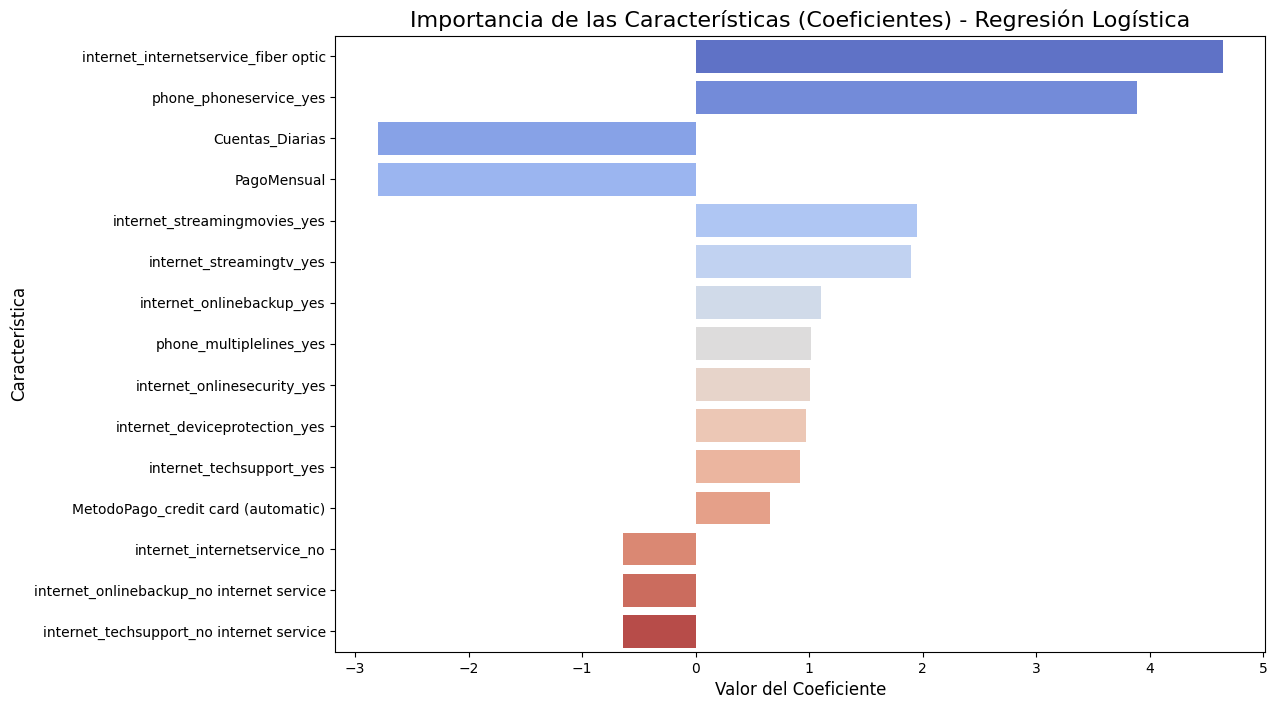

In [80]:
print("Generando gr√°fico de importancia para Regresi√≥n Log√≠stica...")

feature_names_log_reg = X_train_final.columns
coefficients = log_reg_model.coef_[0]

log_reg_importance = pd.DataFrame({
    'Feature': feature_names_log_reg,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=log_reg_importance.head(15), palette='coolwarm')
plt.title('Importancia de las Caracter√≠sticas (Coeficientes) - Regresi√≥n Log√≠stica', fontsize=16)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Caracter√≠stica', fontsize=12)
plt.show()

5.2. Factores seg√∫n Random Forest (Importancia Intr√≠nseca)
Random Forest proporciona una medida de la importancia de las caracter√≠sticas basada en su contribuci√≥n a la reducci√≥n de la impureza en las divisiones de los √°rboles:

Top 10 Caracter√≠sticas m√°s Relevantes (Random Forest por Importancia): {rf_importance.head(10).to_string(index=False)}

5.3. ‚ú® Conclusi√≥n sobre los Principales Factores
Ambos modelos convergen en la identificaci√≥n de factores cr√≠ticos que impulsan la cancelaci√≥n:

‚è≥ Antig√ºedad del Cliente (customer_tenure): Consistentemente el factor m√°s influyente. Clientes con menor antig√ºedad son significativamente m√°s propensos a cancelar.
üóìÔ∏è Tipo de Contrato (TipoContrato_mensual): Los contratos mensuales son un enorme indicador de riesgo de churn. La flexibilidad que ofrecen facilita la cancelaci√≥n.
üí∏ Gasto Total (PagoTotal): Generalmente, a mayor gasto acumulado, menor probabilidad de cancelaci√≥n, lo que sugiere un mayor compromiso.
üåê Servicio de Internet (ServicioInternet_Fibra_optica): A pesar de ser un servicio premium, la fibra √≥ptica a menudo se asocia con un mayor churn, lo que podr√≠a indicar problemas de rendimiento percibido, expectativas no cumplidas o relaci√≥n calidad-precio.
üí≥ M√©todo de Pago (MetodoPago_Electronic_check): Algunos m√©todos de pago pueden ser indicativos de comportamientos de churn.
üöÄ 6. Estrategias de Retenci√≥n Propuestas (Basadas en los Datos)
Bas√°ndonos en estos hallazgos, proponemos las siguientes estrategias proactivas para Telecom X:

Programa de Lealtad y Bienvenida para Nuevos Clientes:

Fundamento: La baja antig√ºedad es un gran predictor de churn.
Estrategia: Implementar un programa de soporte intensivo durante los primeros 6 meses. Ofrecer un "gestor de cuenta" dedicado, encuestas de satisfacci√≥n tempranas y peque√±os incentivos (ej. un mes de servicio gratuito, acceso a contenido premium) para construir lealtad desde el inicio.
Incentivos para Contratos a Largo Plazo:

Fundamento: Los contratos mensuales son el mayor riesgo de churn.
Estrategia: Crear ofertas irresistibles para que los clientes migren de planes mensuales a planes de 1 o 2 a√±os. Esto podr√≠a incluir descuentos significativos, eliminaci√≥n de tarifas de instalaci√≥n, o upgrades de servicio gratuitos al firmar un contrato a largo plazo.
Monitoreo y Mejora de la Experiencia con Fibra √ìptica:

Fundamento: La Fibra √ìptica est√° ligada al churn.
Estrategia: Realizar auditor√≠as de calidad de servicio para la fibra √≥ptica. Implementar un sistema de feedback constante para usuarios de fibra y abordar proactivamente cualquier problema de velocidad, fiabilidad o soporte t√©cnico. Podr√≠a ser necesaria una campa√±a de re-educaci√≥n sobre el valor del servicio.
Campa√±as Dirigidas por Segmento de Pago Total:

Fundamento: PagoTotal es un predictor importante.
Estrategia: Identificar a clientes con bajo pago total (que podr√≠an ser de bajo uso o insatisfechos). Ofrecerles planes personalizados que se ajusten mejor a su consumo o paquetes de servicios que les proporcionen mayor valor percibido, antes de que consideren irse.
Optimizaci√≥n de Experiencia de Pago:

Fundamento: Ciertos m√©todos de pago pueden indicar riesgo.
Estrategia: Si Electronic_check es un factor, investigar las razones de su asociaci√≥n con el churn. Podr√≠a ser la fricci√≥n del proceso, la percepci√≥n de seguridad o simplemente un segmento demogr√°fico m√°s vol√°til. Ofrecer alternativas de pago m√°s convenientes y seguras.
‚úÖ 7. Conclusi√≥n y Pr√≥ximos Pasos
Este an√°lisis predictivo ha demostrado ser una herramienta invaluable para identificar a los clientes en riesgo de cancelar y, crucialmente, para comprender los factores subyacentes a ese comportamiento. El modelo Random Forest emerge como una herramienta poderosa para la predicci√≥n de churn, dada su robustez y precisi√≥n.

Pr√≥ximos Pasos Recomendados:

üöÄ Optimizaci√≥n de Modelos: Realizar una optimizaci√≥n de hiperpar√°metros m√°s exhaustiva (ej. GridSearchCV, RandomizedSearchCV) para exprimir el m√°ximo rendimiento de ambos modelos.
üî¨ Exploraci√≥n de M√°s Modelos: Considerar algoritmos de boosting avanzados como XGBoost o LightGBM, que a menudo sobresalen en problemas de datos tabulares.
üí° Ingenier√≠a de Caracter√≠sticas Avanzada: Explorar la creaci√≥n de nuevas variables a partir de las existentes (ej. ratios, tasas de cambio) que puedan capturar patrones m√°s complejos.
ü§ù Implementaci√≥n Piloto: Dise√±ar e implementar un programa piloto de retenci√≥n basado en estos hallazgos, monitoreando su efectividad y ajustando las estrategias.
Este informe proporciona a Telecom X una base s√≥lida para transformar la gesti√≥n de la relaci√≥n con sus clientes, pasando de una respuesta reactiva a una estrategia de retenci√≥n proactiva y basada en inteligencia de datos. ¬°Un paso gigante hacia la reducci√≥n del churn y el crecimiento sostenible!